In [1]:
%load_ext autoreload
%autoreload 2

# Clean Python3 Dataset

In [1]:
from dataset.CodeNet import CodeNet
code_net = CodeNet(location=r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet")

In [2]:
submission_metadata = code_net.get_submission_metadata()
submission_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13916868 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   submission_id      string
 1   problem_id         string
 2   user_id            string
 3   date               Int64 
 4   language           string
 5   original_language  string
 6   filename_ext       string
 7   status             string
 8   cpu_time           Int64 
 9   memory             Int64 
 10  code_size          Int64 
 11  accuracy           string
dtypes: Int64(4), string(8)
memory usage: 1.4 GB


In [3]:
accepted_python_submissions = submission_metadata.query("language == 'Python' and status == 'Accepted'")
accepted_python_submissions.groupby(["original_language"]).size().reset_index(name="count").sort_values("count", ascending=False)

,original_language,count
8,Python (3.4.3),993168
9,Python (3.8.2),367766
2,PyPy3 (2.4.0),166907
3,PyPy3 (7.3.0),115482
10,Python3,115153
4,Python,18264
6,Python (2.7.6),15735
0,PyPy2 (5.6.0),2767
1,PyPy2 (7.3.0),1232
5,Python (2.7.3),65


In [4]:
accepted_python3_submissions = accepted_python_submissions.query("original_language in ['Python (3.4.3)', 'Python (3.8.2)', 'Python (3.4.2)']")
accepted_python3_submissions

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
0,s744927939,p02534,u963963908,1601508012,Python,Python (3.8.2),py,Accepted,20,9156,194,<NA>
3,s315346059,p02534,u572032237,1601504234,Python,Python (3.8.2),py,Accepted,20,9096,33,<NA>
5,s105595612,p02534,u479230440,1601501816,Python,Python (3.8.2),py,Accepted,23,9064,34,<NA>
22,s021977526,p02534,u280966279,1601496208,Python,Python (3.8.2),py,Accepted,26,8884,66,<NA>
26,s739220920,p02534,u903629757,1601495724,Python,Python (3.8.2),py,Accepted,24,9072,31,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
737,s283438001,p04051,u102461423,1574129650,Python,Python (3.4.3),py,Accepted,761,40384,794,<NA>
738,s051907309,p04051,u102461423,1574129202,Python,Python (3.4.3),py,Accepted,778,40384,806,<NA>
740,s218722401,p04051,u102461423,1574125877,Python,Python (3.4.3),py,Accepted,753,40124,1223,<NA>
742,s522586576,p04051,u102461423,1574125583,Python,Python (3.4.3),py,Accepted,762,40384,1223,<NA>


## Filter Outliers

In [5]:
import re
outlier_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\Python\Python_accepted_outliers.txt"
outlier_submission_ids = []
with open(outlier_path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        submission_id = re.findall(r"s\d{9}", line)[0]
        outlier_submission_ids.append(submission_id)

In [6]:
len(outlier_submission_ids)

14295

In [7]:
python3_outlier_filtered = accepted_python3_submissions.query(f"submission_id not in {outlier_submission_ids}")
python3_outlier_filtered

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
0,s744927939,p02534,u963963908,1601508012,Python,Python (3.8.2),py,Accepted,20,9156,194,<NA>
3,s315346059,p02534,u572032237,1601504234,Python,Python (3.8.2),py,Accepted,20,9096,33,<NA>
5,s105595612,p02534,u479230440,1601501816,Python,Python (3.8.2),py,Accepted,23,9064,34,<NA>
22,s021977526,p02534,u280966279,1601496208,Python,Python (3.8.2),py,Accepted,26,8884,66,<NA>
26,s739220920,p02534,u903629757,1601495724,Python,Python (3.8.2),py,Accepted,24,9072,31,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
737,s283438001,p04051,u102461423,1574129650,Python,Python (3.4.3),py,Accepted,761,40384,794,<NA>
738,s051907309,p04051,u102461423,1574129202,Python,Python (3.4.3),py,Accepted,778,40384,806,<NA>
740,s218722401,p04051,u102461423,1574125877,Python,Python (3.4.3),py,Accepted,753,40124,1223,<NA>
742,s522586576,p04051,u102461423,1574125583,Python,Python (3.4.3),py,Accepted,762,40384,1223,<NA>


## Filter Duplicate Submissions

In [8]:
import os
dupl_clusters_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\Python\clusters"
cluster_files = os.listdir(dupl_clusters_path)
cluster_dict = {}
cluster_no = 0
cluster_dict[cluster_no] = []
for cluster_file in cluster_files:
    cluster_file_path = f"{dupl_clusters_path}\\{cluster_file}"
    with open(cluster_file_path, 'r', encoding='utf-8') as file:
        while (line := file.readline()):
            line = line.rstrip()
            if (line == ''):
                cluster_no += 1
                cluster_dict[cluster_no] = []
            else:
                submission_id = re.findall(r"s\d{9}", line)[0]
                cluster_dict[cluster_no].append(submission_id)

In [9]:
cluster_dict_filtered = {key:val for key, val in cluster_dict.items() if len(val) > 1}

In [10]:
cluster_dict_removed_submissions = {}
cpp14_outlier_filtered_sub_ids = set(python3_outlier_filtered['submission_id'].values)
for key, value in cluster_dict_filtered.items():
    cluster_dict_removed_submissions[key] = []
    for v in value:
        if v in cpp14_outlier_filtered_sub_ids:
            cluster_dict_removed_submissions[key].append(v)

In [11]:
cluster_dict_filtered_1 = {key:val for key, val in cluster_dict_removed_submissions.items() if len(val) > 1}

In [12]:
import random
duplicate_submission_ids = []
for key, value in cluster_dict_filtered_1.items():
    tmp = value.copy()
    tmp.remove(random.choice(tmp))
    duplicate_submission_ids.extend(tmp)

In [13]:
len(duplicate_submission_ids)

513555

In [14]:
python3_dupl_filtered = python3_outlier_filtered.query(f"submission_id not in {duplicate_submission_ids}")
python3_dupl_filtered

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
22,s021977526,p02534,u280966279,1601496208,Python,Python (3.8.2),py,Accepted,26,8884,66,<NA>
26,s739220920,p02534,u903629757,1601495724,Python,Python (3.8.2),py,Accepted,24,9072,31,<NA>
42,s023921588,p02534,u976887940,1601492327,Python,Python (3.8.2),py,Accepted,22,9096,109,<NA>
54,s573009688,p02534,u657719194,1601489251,Python,Python (3.8.2),py,Accepted,25,9096,69,<NA>
55,s057560584,p02534,u193880030,1601489163,Python,Python (3.8.2),py,Accepted,21,9084,56,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
441,s776194541,p04051,u984276646,1582255917,Python,Python (3.4.3),py,Accepted,1458,71596,956,<NA>
737,s283438001,p04051,u102461423,1574129650,Python,Python (3.4.3),py,Accepted,761,40384,794,<NA>
738,s051907309,p04051,u102461423,1574129202,Python,Python (3.4.3),py,Accepted,778,40384,806,<NA>
740,s218722401,p04051,u102461423,1574125877,Python,Python (3.4.3),py,Accepted,753,40124,1223,<NA>


## Filter identical problems

In [17]:
python3_dupl_filtered_problem_count = python3_dupl_filtered.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)
python3_dupl_filtered_problem_count

,problem_id,count
133,p02677,3673
144,p02688,3315
116,p02658,3305
514,p03086,3131
104,p02641,3108
...,...,...
1092,p03753,1
1202,p03886,1
1199,p03883,1
1194,p03870,1


In [18]:
ident_problems_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\identical_problem_clusters"
duplicate_problem_ids = []
with open(ident_problems_path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        cluster = line.split(',')
        cluster_rows = python3_dupl_filtered_problem_count.query(f"problem_id in {cluster}")
        if not cluster_rows.empty:
            largest_cluster_idx = cluster_rows['count'].idxmax()
            largest_cluster_problem_id = cluster_rows.loc[largest_cluster_idx]['problem_id']
            cluster.remove(largest_cluster_problem_id)
            duplicate_problem_ids.extend(cluster)

In [19]:
len(duplicate_problem_ids)

133

In [20]:
python3_final = python3_dupl_filtered.query(f"problem_id not in {duplicate_problem_ids}")
python3_final

,submission_id,problem_id,user_id,date,language,original_language,filename_ext,status,cpu_time,memory,code_size,accuracy
42,s023921588,p02534,u976887940,1601492327,Python,Python (3.8.2),py,Accepted,22,9096,109,<NA>
54,s573009688,p02534,u657719194,1601489251,Python,Python (3.8.2),py,Accepted,25,9096,69,<NA>
55,s057560584,p02534,u193880030,1601489163,Python,Python (3.8.2),py,Accepted,21,9084,56,<NA>
60,s284010285,p02534,u086217034,1601486312,Python,Python (3.8.2),py,Accepted,26,9104,82,<NA>
76,s312109393,p02534,u614100538,1601475753,Python,Python (3.8.2),py,Accepted,24,9068,66,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
441,s776194541,p04051,u984276646,1582255917,Python,Python (3.4.3),py,Accepted,1458,71596,956,<NA>
737,s283438001,p04051,u102461423,1574129650,Python,Python (3.4.3),py,Accepted,761,40384,794,<NA>
738,s051907309,p04051,u102461423,1574129202,Python,Python (3.4.3),py,Accepted,778,40384,806,<NA>
740,s218722401,p04051,u102461423,1574125877,Python,Python (3.4.3),py,Accepted,753,40124,1223,<NA>


In [24]:
python3_final_problem_count = python3_final.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {300}")
python3_final_problem_count

,problem_id,count
133,p02677,3673
144,p02688,3315
116,p02658,3305
511,p03086,3131
104,p02641,3108
...,...,...
211,p02757,309
14,p02550,305
171,p02715,304
80,p02616,304


In [15]:
python3_dupl_filtered.to_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\python3_w_ident_problems.csv")

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\python3.csv", index_col=0)

In [4]:
problem_ids = df.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)
problem_ids

,problem_id,count
133,p02677,3673
144,p02688,3315
116,p02658,3305
511,p03086,3131
104,p02641,3108
...,...,...
1150,p03974,1
844,p03513,1
845,p03520,1
1141,p03960,1


In [8]:
problem_id_dataset = problem_ids.query(f"count >= {1000}").sample(100)
problem_id_dataset

,problem_id,count
435,p03000,2229
500,p03074,1021
174,p02718,2881
1192,p04031,1086
499,p03073,2892
...,...,...
502,p03076,2874
104,p02641,3108
138,p02682,2419
92,p02628,1518


In [9]:
problem_ids_dataset = list(problem_id_dataset['problem_id'].values)
len(problem_ids_dataset)

100

In [14]:
import os
import shutil
target_dir = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\python3_100_1000"
for problem_id in problem_ids_dataset:
    python3_samples = df.query(f'problem_id == "{problem_id}"').sample(1000)

    problem_id_trg_dir = os.path.join(target_dir, problem_id)
    os.mkdir(problem_id_trg_dir)

    problem_id_python3_trg_dir = problem_id_trg_dir
    submission_ids = python3_samples["submission_id"].values
    paths = code_net.get_src_paths_of_submissions(list(submission_ids))
    for _, value in paths.items():
        shutil.copy(value, problem_id_python3_trg_dir)

In [15]:
import os
import re
path = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\python3_100_1000"

fname = []
for root,d_names,f_names in os.walk(path):
    for f in f_names:
        fname.append(os.path.join(root, f))
with open(os.path.join(path, "ai4code_input.txt"), "w") as f:
    for fn in fname:
       problem_id = re.findall(r"p\d{5}", fn)[0]
       f.write(fn + " " + path + f"\\ai4code_python\\{problem_id}\\\n")

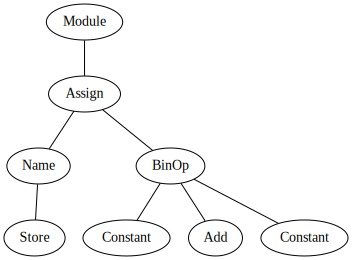

In [3]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\python_snippet.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [2]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\python3_100_1000\ai4code_problem_class_python", r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\python3_100_1000\ai4code_python", 300, 50, 50)

In [4]:
dataset.create()

processing p02547 ...
... finished p02547
processing p02572 ...
... finished p02572
processing p02582 ...
... finished p02582
processing p02583 ...
... finished p02583
processing p02595 ...
... finished p02595
processing p02603 ...
... finished p02603
processing p02614 ...
... finished p02614
processing p02628 ...
... finished p02628
processing p02630 ...
... finished p02630
processing p02639 ...
... finished p02639
processing p02641 ...
... finished p02641
processing p02646 ...
... finished p02646
processing p02659 ...
... finished p02659
processing p02660 ...
... finished p02660
processing p02663 ...
... finished p02663
processing p02681 ...
... finished p02681
processing p02682 ...
... finished p02682
processing p02684 ...
... finished p02684
processing p02687 ...
... finished p02687
processing p02693 ...
... finished p02693
processing p02718 ...
... finished p02718
processing p02724 ...
... finished p02724
processing p02730 ...
... finished p02730
processing p02742 ...
... finished

In [5]:
dataset.get_vocabulary_map()

{'Add': 1,
 'And': 2,
 'AnnAssign': 3,
 'Assert': 4,
 'Assign': 5,
 'Attribute': 6,
 'AugAssign': 7,
 'BinOp': 8,
 'BitAnd': 9,
 'BitOr': 10,
 'BitXor': 11,
 'BoolOp': 12,
 'Break': 13,
 'Call': 14,
 'ClassDef': 15,
 'Compare': 16,
 'Constant': 17,
 'Continue': 18,
 'Del': 19,
 'Delete': 20,
 'Dict': 21,
 'DictComp': 22,
 'Div': 23,
 'Eq': 24,
 'ExceptHandler': 25,
 'Expr': 26,
 'FloorDiv': 27,
 'For': 28,
 'FormattedValue': 29,
 'FunctionDef': 30,
 'GeneratorExp': 31,
 'Global': 32,
 'Gt': 33,
 'GtE': 34,
 'If': 35,
 'IfExp': 36,
 'Import': 37,
 'ImportFrom': 38,
 'In': 39,
 'Invert': 40,
 'Is': 41,
 'IsNot': 42,
 'JoinedStr': 43,
 'LShift': 44,
 'Lambda': 45,
 'List': 46,
 'ListComp': 47,
 'Load': 48,
 'Lt': 49,
 'LtE': 50,
 'Mod': 51,
 'Module': 52,
 'Mult': 53,
 'Name': 54,
 'NamedExpr': 55,
 'Nonlocal': 56,
 'Not': 57,
 'NotEq': 58,
 'NotIn': 59,
 'Or': 60,
 'Pass': 61,
 'Pow': 62,
 'RShift': 63,
 'Raise': 64,
 'Return': 65,
 'Set': 66,
 'SetComp': 67,
 'Slice': 68,
 'Starred': 69

In [6]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [7]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

30000/30000 [==============================] - 262s 9ms/step - loss: 0.6469 - categorical_accuracy: 0.8460 - precision: 0.9390 - recall: 0.7841 - val_loss: 0.2659 - val_categorical_accuracy: 0.9288 - val_precision: 0.9469 - val_recall: 0.9194


In [8]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5000/5000 [==============================] - 32s 6ms/step - loss: 0.2627 - categorical_accuracy: 0.9302 - precision: 0.9498 - recall: 0.9188


In [9]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

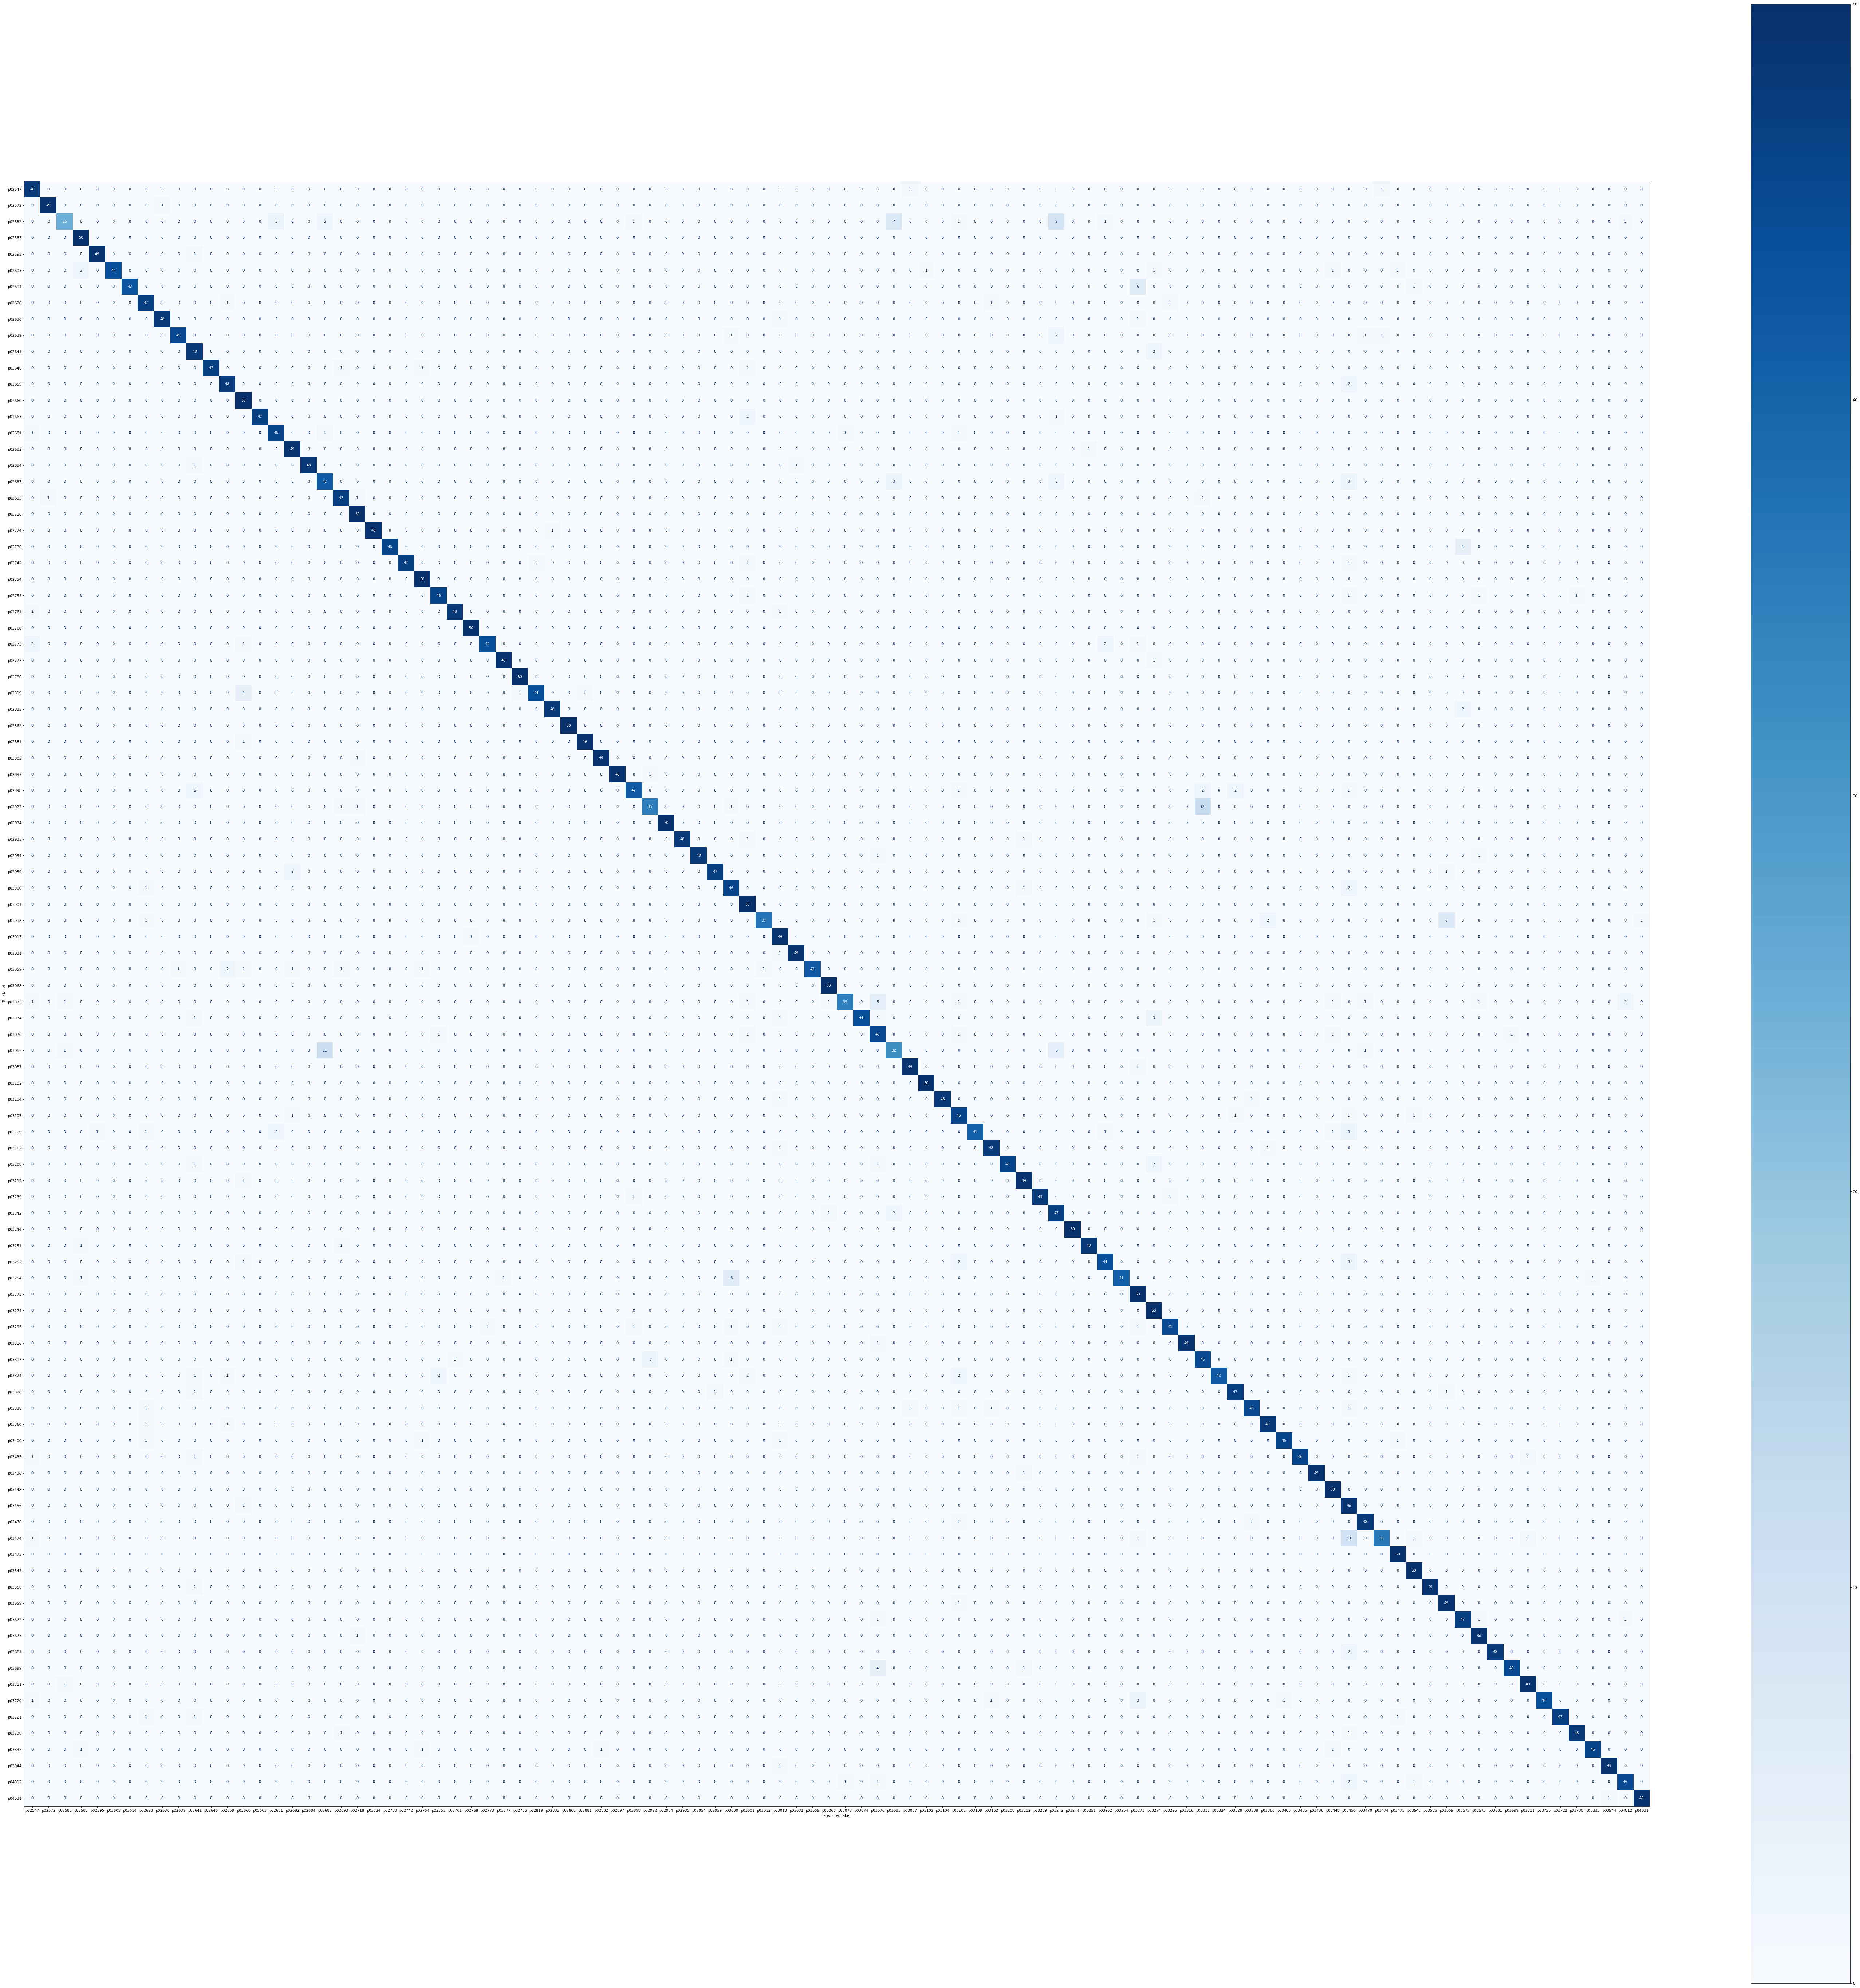

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(100, 100))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [11]:
from sklearn.metrics import classification_report

print(classification_report(expected_labels, predicted_labels, labels=labels))

              precision    recall  f1-score   support

      p02547       0.86      0.96      0.91        50
      p02572       0.98      0.98      0.98        50
      p02582       0.89      0.50      0.64        50
      p02583       0.91      1.00      0.95        50
      p02595       0.98      0.98      0.98        50
      p02603       1.00      0.88      0.94        50
      p02614       1.00      0.86      0.92        50
      p02628       0.87      0.94      0.90        50
      p02630       0.98      0.96      0.97        50
      p02639       0.98      0.90      0.94        50
      p02641       0.81      0.96      0.88        50
      p02646       1.00      0.94      0.97        50
      p02659       0.91      0.96      0.93        50
      p02660       0.83      1.00      0.91        50
      p02663       1.00      0.94      0.97        50
      p02681       0.90      0.92      0.91        50
      p02682       0.92      0.98      0.95        50
      p02684       1.00    

In [12]:
from collections import Counter
node_list = list(dataset.get_vocabulary_map())
overall_importance = {}
for test_item in test_generator:
    nodes, children = test_item[0]
    conv_filter_activations = model.conv_layer([nodes, children])
    node_importance = model.pooling_layer(conv_filter_activations)[0]
    node_importance_list = node_importance.numpy().tolist()[0]
    counter = Counter(node_importance_list)
    for node_id, value in counter.items():
        one_hot_node_type = nodes[0][node_id]
        node_type = node_list[argmax(one_hot_node_type)-1]
        if node_type in overall_importance:
            overall_importance[node_type] += value
        else:
            overall_importance[node_type] = value

In [13]:
for w in sorted(overall_importance, key=overall_importance.get, reverse=True):
    print(w, overall_importance[w])

Module 1491354
BinOp 382164
Compare 181925
Call 143262
If 109938
For 84773
AugAssign 74578
Assign 71554
Tuple 49905
Subscript 44005
Attribute 35043
List 25612
FunctionDef 24139
ListComp 23078
Slice 19089
BoolOp 17704
UnaryOp 15861
While 15664
Name 14943
Mod 14194
Eq 12358
Mult 9944
IfExp 9455
comprehension 9226
Div 8837
Load 8227
Sub 7306
FloorDiv 6469
Break 6415
Pow 5866
keyword 5330
Dict 4805
LtE 4804
GtE 4480
alias 4380
NotEq 4276
Lt 4170
Import 4108
arguments 4057
GeneratorExp 3771
Lambda 3696
ImportFrom 3499
Return 3311
In 3002
Gt 2935
Starred 2751
Expr 1853
BitAnd 1562
Continue 1318
NotIn 1308
Set 993
Or 822
BitXor 714
Not 702
arg 647
RShift 482
Delete 441
And 354
Add 344
Try 341
Pass 282
ClassDef 174
ExceptHandler 163
SetComp 135
JoinedStr 128
LShift 124
Yield 118
Global 110
Is 109
USub 95
Del 79
BitOr 79
withitem 55
Invert 51
DictComp 45
FormattedValue 21
Assert 19
IsNot 18
UAdd 18
With 14
Store 13
Raise 6


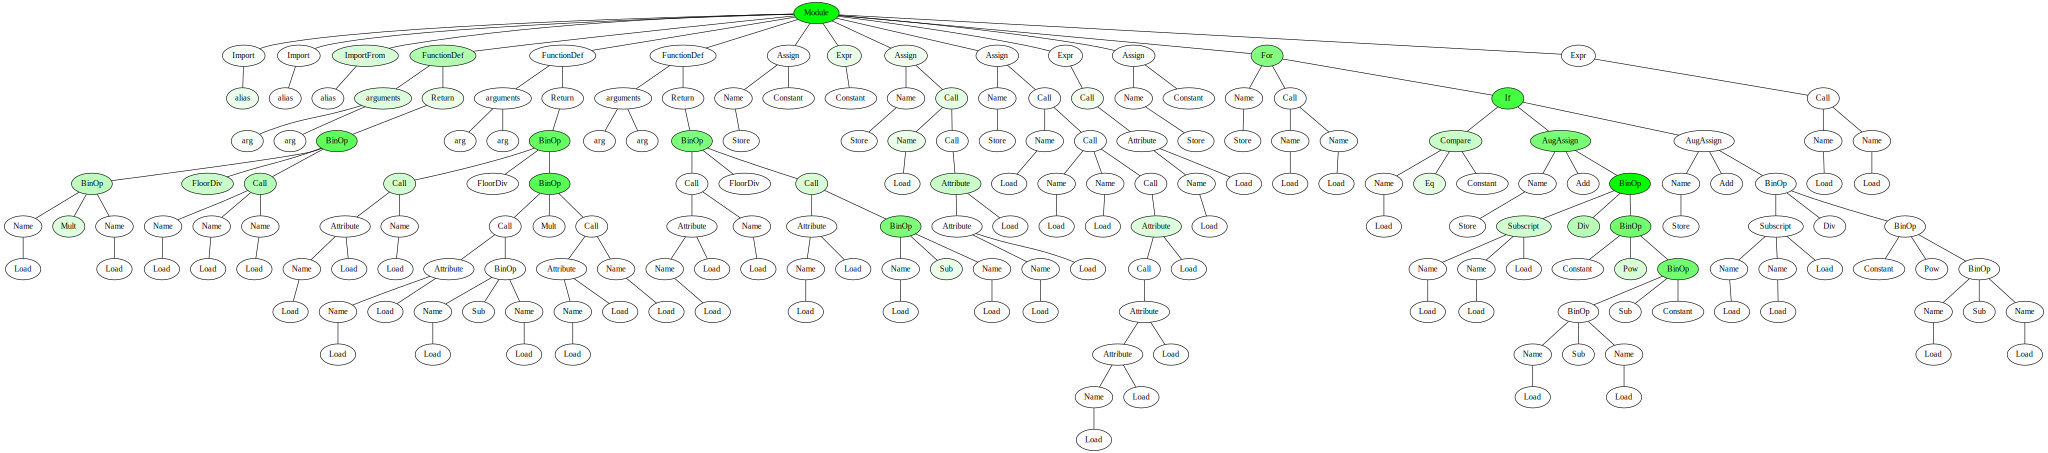

In [14]:
from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)